# Datensätze erzeugen

In [38]:
import random

# 🏰 Beispielhafte aventurisch klingende Namenslisten (frei erfunden)
CHARACTERS = ["Ardorin", "Fenia", "Raskir", "Torgan", "Iralia", "Kendrim"]
TITLES = ["Magier", "Kriegerin", "Geweihter", "Priesterin", "Waldläufer", "Söldnerin"]
DEITIES = ["Alvora", "Dergon", "Rhalia", "Turek", "Vernan", "Ylindra"]
DEMONS = ["Zerathul", "Kargoth", "Marnoth", "Velkara", "Urghal"]
PLACES = ["Garethor", "Nerath", "Firunen", "Aldermund", "Kargath", "Borandel"]
ACTIONS = [
    "wirkt einen mächtigen Zauber",
    "segnet die Gläubigen",
    "kämpft gegen die Schatten",
    "reist durch das alte Reich",
    "flüstert ein Gebet zu",
    "ruft die Macht von",
    "schlägt das Lager auf nahe"
]
OBJECTS = ["den Fluss", "den Tempel", "das Tor", "die Ruinen", "den Berg"]

# 💾 Erzeuge 1000 zufällige Sätze mit POS-Tags
def generate_dsa_dataset(n=1000):
    data = []
    for _ in range(n):
        char = random.choice(CHARACTERS)
        title = random.choice(TITLES)
        deity = random.choice(DEITIES)
        demon = random.choice(DEMONS)
        place = random.choice(PLACES)
        action = random.choice(ACTIONS)
        obj = random.choice(OBJECTS)

        # Satzvarianten
        templates = [
            f"Der {title} {char} {action} {place}.",
            f"Die {title} {char} {action} {obj}.",
            f"{char}, der {title}, {action} {place}.",
            f"Im Tempel von {place} betet {char} zu {deity}.",
            f"{char} trotzt den Versuchungen des Dämons {demon}.",
            f"Die Gläubigen von {place} rufen den Namen {deity}s.",
            f"Aus den Schatten von {place} erhebt sich {demon}.",
        ]

        text = random.choice(templates)

        # Sehr einfache POS-Tag-Heuristik (kann verfeinert werden)
        tokens = text.replace(",", "").split()
        pos_tags = []
        for t in tokens:
            if t.istitle() and t not in ["Der", "Die", "Im", "Aus", "Des", "Von"]:
                pos_tags.append("PROPN")
            elif t in ["Der", "Die", "Des", "Im", "Von", "Aus"]:
                pos_tags.append("DET")
            elif t.endswith("."):
                pos_tags.append("PUNCT")
            elif t in ["betet", "wirkt", "segnet", "kämpft", "flüstert", "ruft", "reist", "trotzt", "erhebt", "schlägt"]:
                pos_tags.append("VERB")
            elif t in ["zu", "gegen", "durch", "nahe"]:
                pos_tags.append("ADP")
            else:
                pos_tags.append("NOUN")

        data.append((text, {"pos": pos_tags}))
    return data


if __name__ == "__main__":
    TRAIN_DATA = generate_dsa_dataset(1000)
    print(f"Erzeugt {len(TRAIN_DATA)} DSA-Datensätze.")
    print("Beispiel:")
    for sample in random.sample(TRAIN_DATA, 12):
        print(sample)


Erzeugt 1000 DSA-Datensätze.
Beispiel:
('Der Geweihter Ardorin ruft die Macht von Kargath.', {'pos': ['DET', 'PROPN', 'PROPN', 'VERB', 'NOUN', 'PROPN', 'NOUN', 'PROPN']})
('Die Gläubigen von Firunen rufen den Namen Dergons.', {'pos': ['DET', 'PROPN', 'NOUN', 'PROPN', 'NOUN', 'NOUN', 'PROPN', 'PROPN']})
('Die Priesterin Ardorin schlägt das Lager auf nahe die Ruinen.', {'pos': ['DET', 'PROPN', 'PROPN', 'VERB', 'NOUN', 'PROPN', 'NOUN', 'ADP', 'NOUN', 'PROPN']})
('Die Gläubigen von Nerath rufen den Namen Rhalias.', {'pos': ['DET', 'PROPN', 'NOUN', 'PROPN', 'NOUN', 'NOUN', 'PROPN', 'PROPN']})
('Aus den Schatten von Kargath erhebt sich Kargoth.', {'pos': ['DET', 'NOUN', 'PROPN', 'NOUN', 'PROPN', 'VERB', 'NOUN', 'PROPN']})
('Iralia trotzt den Versuchungen des Dämons Marnoth.', {'pos': ['PROPN', 'VERB', 'NOUN', 'PROPN', 'NOUN', 'PROPN', 'PROPN']})
('Im Tempel von Garethor betet Ardorin zu Ylindra.', {'pos': ['DET', 'PROPN', 'NOUN', 'PROPN', 'VERB', 'PROPN', 'ADP', 'PROPN']})
('Der Geweihter Fe

### Namenslisten craweln

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string

url = "https://de.wiki-aventurica.de/wiki/Aventurische_Namen/Automatischer_Index/A"  # z. B. "https://…"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

# Alle Tabellen mit class="wikitable alternate" finden
tables = soup.find_all("table", class_="wikitable alternate")

# Zweite Tabelle auswählen (Index 1)
table2 = tables[0]

# Tabelle in DataFrame umwandeln (via pandas) für einfache Spaltenbehandlung
df = pd.read_html(str(table2))[0]

# Prüfen, ob Spalte "Artikel" vorhanden ist
if "Artikel" not in df.columns:
    raise ValueError("Spalte 'Artikel' nicht gefunden in der zweiten Tabelle")

# Spalte „Artikel“ extrahieren
artikel_spalte = df["Artikel"].tolist()

print(artikel_spalte)


["A'Hrzzan", "A'fryad", 'Aada', 'Aagnitas', 'Aalrik', 'Aaraloth', 'Aargaal', 'Aargal', 'Aarguk', 'Aartrude', 'Aarwin', 'Aatto', 'Abadu', 'Abbo', 'Abdul', 'Abdulon', 'Abdulrik', 'Abelmir', 'Aberglaube', 'Abjo', 'Abla', 'Ablasion', 'Aboralm (Stammvater)', 'Abra', 'Abrizah', 'Abtuul', 'Abu', 'Abubrecht', 'Achatazz', 'Achaz', 'Achmad', 'Achmed', 'Achmedziber', 'Achtev', 'Achtevsabu', 'Achzul', 'Ada', 'Adailana', 'Adailoë', 'Adalhard', 'Adaloë', 'Adalric', 'Adamante', 'Adamantosch', 'Adaon', 'Adaque', 'Adario', 'Adawadt', 'Adel', 'Adelgund', 'Adelgunde', 'Adelhelm', 'Adil', 'Adilgunde', 'Adjok', 'Admares (Heiliger)', 'Adran (Name)', 'Adrej', 'Adrejin', 'Adula', 'Aedan', 'Aedha', 'Aedin', 'Aedith', 'Aedre', 'Aelfhild', 'Aelfwin', 'Aelindir', 'Aemilia', 'Aesa', 'Affe', 'Afra', 'Agam', 'Agdan', 'Agescha', 'Aghira', 'Aglaya', 'Agnitha', 'Agrescha', 'Agribert', 'Agrimothea', 'Agrimothlieb', 'Agusto', 'Ahani', "Ahazz'Hur", 'Ahjanankhra', 'Ahmed', 'Ahmedin', "Ahn'alazina (Tänzerin)", 'Ahne', 'Ahum

/tmp/ipykernel_4439/1963543199.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table2))[0]


## Aventurische Namen

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string
from io import StringIO

# Basis-URL (ersetze durch deine)
# Beispiel: "https://example.com/"
base_url = "https://de.wiki-aventurica.de/wiki/Aventurische_Namen/Automatischer_Index/"  
headers = {"User-Agent": "Mozilla/5.0"}
alle_artikel = []  # Liste für gesammelte Artikel

# Schleife über Buchstaben A–Z
for buchstabe in string.ascii_uppercase:  # -> 'a' bis 'z'
    url = f"{base_url}{buchstabe}"  # z. B. https://example.com/a
    print(f"Verarbeite: {url}")

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
    except requests.RequestException as e:
        print(f"Fehler beim Laden von {url}: {e}")
        continue

    soup = BeautifulSoup(response.content, "html.parser")

    # Alle Tabellen mit class="wikitable alternate" finden
    tables = soup.find_all("table", class_="wikitable alternate")

    # Zweite Tabelle auswählen
    table2 = tables[0]

    # Tabelle in DataFrame umwandeln
    try:
        df = pd.read_html(StringIO(str(table2)))[0]
    except Exception as e:
        print(f"Konnte Tabelle auf {url} nicht lesen: {e}")
        continue

    # Prüfen, ob Spalte "Artikel" existiert
    if "Artikel" not in df.columns:
        print(f"Spalte 'Artikel' auf {url} nicht gefunden.")
        continue

    artikel = df["Artikel"].dropna().astype(str).tolist()
    alle_artikel.extend(artikel)

# Doppelte entfernen (optional)
alle_artikel = list(dict.fromkeys(alle_artikel))

print(f"\nGesamtanzahl Artikel: {len(alle_artikel)}")
print(alle_artikel)


In [ ]:
import re

print(len(alle_artikel))
alle_artikel_bereinigt = [re.sub(r"\s*\(.*?\)", "", name).strip() for name in alle_artikel]

6670
6670


In [24]:
file = open('dsa_names.txt', 'w')
for name in alle_artikel_bereinigt:
    file.write(name+"\n")
file.close()

## Aventurische Dämonen

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import string
from io import StringIO

# Basis-URL (ersetze durch deine)
# Beispiel: "https://example.com/"
url = "https://de.wiki-aventurica.de/wiki/D%C3%A4mon/Liste"  
headers = {"User-Agent": "Mozilla/5.0"}
alle_dnamen = []  # Liste für gesammelte Artikel

print(f"Verarbeite: {url}")
try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()
except requests.RequestException as e:
    print(f"Fehler beim Laden von {url}: {e}")

soup = BeautifulSoup(response.content, "html.parser")

#print(soup)

# Alle Tabellen mit class="wikitable alternate" finden
tables = soup.find_all("table", class_="wikitable sortable")

    # Zweite Tabelle auswählen
table2 = tables[0]

    # Tabelle in DataFrame umwandeln
try:
    df = pd.read_html(StringIO(str(table2)))[0]
except Exception as e:
    print(f"Konnte Tabelle auf {url} nicht lesen: {e}")

    # Prüfen, ob Spalte "dnamen" existiert
if "Name" not in df.columns:
    print(f"Spalte 'Name' auf {url} nicht gefunden.")

dnamen = df["Name"].dropna().astype(str).tolist()
alle_dnamen.extend(dnamen)

# Doppelte entfernen (optional)
alle_dnamen = list(dict.fromkeys(alle_dnamen))

print(f"\nGesamtanzahl dnamen: {len(alle_dnamen)}")
print(alle_dnamen)


Verarbeite: https://de.wiki-aventurica.de/wiki/D%C3%A4mon/Liste

Gesamtanzahl dnamen: 281
["A'Ny'Cha", "Ab'balryghoq", "Abysir'Tos", 'Abysmaroth', 'Abyssabel', 'Abyssandur', 'Achorhobai', 'Aemnollemna', 'Agribaal', 'Agrimoth', 'Aketun', 'Altijar', "Am'Iketezoth", 'Amazeroth', 'Amrifas', 'Amrychoth', 'An-Domrai', 'Aphasmayra', 'Aphasmayras Atem', 'Aphestadil', 'Arakal-Baum', 'Arbancin', 'Arjunoor', 'Arkanai', 'Arkhobal', 'Asarjaban', 'Asfaloth', "Ash' la Par", "Ashta'suul", 'Asqarath', 'Assrael', 'Assuroth', 'Aswa-Djalihd', "Atesh'Seruhn", 'Atuum', "Az'Kabil", 'Azamir', "Azzir-Trath'tok", 'Azzitai', 'Bahamuth', "Bal'Irhiadh", 'Balkabireth', "Balkha'bul", 'Balrygon', 'Barabuul', "Beel'Ymash", 'Beel-Arkanael', "Bel'Agribaal", "Bel'Natar", 'Belhalhar', 'Belkelel', 'Belmakar', 'Belshirash', 'Belzhorash', "Bha'Levek", 'Bhurkhesch', 'Blakharaz', 'Blutbeflecktes Gold (Tasfarelel)', 'Boransdorn', 'Braggu', "Brukha'Klah", 'Burakos', "Cha'Khar", "Cha'Muyan", "Chai'Kashêt", 'Charyptoroth', 'Chiasm

In [37]:
import re

pattern = r"\([^()]*\)"
gefundene_klammern = [match for name in alle_dnamen for match in re.findall(pattern, name)]
print("Gefundene Klammerinhalte:",len(gefundene_klammern))
print(gefundene_klammern)

alle_dnamen_bereinigt = [re.sub(r"\s*\(.*?\)", "", name).strip() for name in alle_dnamen]

Gefundene Klammerinhalte: 5
['(Tasfarelel)', '(Dämon)', '(Dämon)', '(Dämonenarche)', '(Dämon)']


In [32]:
file = open('dsa_dnames.txt', 'w')
for name in alle_dnamen_bereinigt:
    file.write(name+"\n")
file.close()

print("Datei erfolgreich angelegt!")

Datei erfolgreich angelegt!


# Fine-Tuning

In [27]:
import random
import spacy
from spacy.training import Example
from spacy.util import minibatch, compounding
from data.dsa_train_data_fixed import TRAIN_DATA  # dein korrigiertes Dataset

#Lade Basis-Modell
nlp = spacy.load("de_core_news_sm")

"""# 1️⃣ POS-Tagger-Komponente holen
tagger = nlp.get_pipe("tagger")

# 2️⃣ Falls du eigene Tags nutzt, hier hinzufügen (optional)
for sent, ann in TRAIN_DATA:
    for tag in ann["pos"]:
        if tag not in tagger.labels:
            tagger.add_label(tag)"""

#Erstelle Optimizer mit kleiner Lernrate
optimizer = nlp.resume_training()
optimizer.learn_rate = 0.001  # kleinere Lernrate = stabileres Fine-Tuning

#Batching-Parameter (Batchgröße wächst im Verlauf leicht)
batch_sizes = compounding(4.0, 16.0, 1.001)

print("🚀 Starte Fine-Tuning auf DSA-Daten ...\n")

for epoch in range(6):  # etwas mehr Epochen, weil Lernrate kleiner ist
    random.shuffle(TRAIN_DATA)  # mischt die Trainingssätze (wichtig!)
    losses = {}

    # minibatch = mehrere Trainingsbeispiele pro Update-Schritt
    for batch in minibatch(TRAIN_DATA, size=batch_sizes):
        examples = []
        for text, annotations in batch:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            examples.append(example)
        nlp.update(examples, sgd=optimizer, losses=losses)

    print(f"Epoche {epoch+1:02d} - Loss: {losses}")

#Modell speichern
output_dir = "de_dsa_tagger"
nlp.to_disk(output_dir)
print(f"Modell gespeichert unter: {output_dir}")


🚀 Starte Fine-Tuning auf DSA-Daten ...

Epoche 01 - Loss: {'tok2vec': 164.45699882507324, 'tagger': 0.0, 'morphologizer': 54.71861934661865, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 02 - Loss: {'tok2vec': 133.2322769165039, 'tagger': 0.0, 'morphologizer': 45.33399486541748, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 03 - Loss: {'tok2vec': 64.84106659889221, 'tagger': 0.0, 'morphologizer': 21.054184436798096, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 04 - Loss: {'tok2vec': 13.614461256413279, 'tagger': 0.0, 'morphologizer': 2.658950947690755, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 05 - Loss: {'tok2vec': 1.073879711824702, 'tagger': 0.0, 'morphologizer': 0.16191336512565613, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 06 - Loss: {'tok2vec': 3.16397982790113, 'tagger': 0.0, 'morphologizer': 0.46372415219957475, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Modell gespeichert unter: de_dsa_tagger


# Datensätze auf fehlerhafte Anzahl (Tokens<=>POS) überprüfen

In [9]:
import spacy
from data.dsa_train_data import TRAIN_DATA
from pprint import pprint

# ⚙️ Lade ein deutsches Tokenizer-Modell (nur zum Tokenisieren!)
nlp = spacy.blank("de")

print("🔍 Überprüfe DSA-Trainingsdaten auf Token/POS-Längen...\n")

fixed_data = []
errors = 0

for text, ann in TRAIN_DATA:
    doc = nlp.make_doc(text)
    tokens = [t.text for t in doc]
    pos = ann["pos"]

    if len(tokens) != len(pos):
        errors += 1
        print(f"⚠️  Mismatch in Satz: {text}")
        print(f"   Tokens ({len(tokens)}): {tokens}")
        print(f"   POS    ({len(pos)}): {pos}")

        # Vorschlag: gleiche Länge auffüllen
        # Wenn mehr Tokens → kürze POS
        # Wenn weniger Tokens → füge 'X' hinzu (unbekannt)
        if len(tokens) > len(pos):
            corrected_pos = pos + ["X"] * (len(tokens) - len(pos))
        else:
            corrected_pos = pos[:len(tokens)]

        print(f"👉 Vorschlag korrigiert ({len(corrected_pos)}): {corrected_pos}\n")

        fixed_data.append((text, {"pos": corrected_pos}))
    else:
        fixed_data.append((text, ann))

print(f"\n✅ Überprüfung abgeschlossen. {errors} fehlerhafte Sätze gefunden.\n")

# Optional: korrigierte Datei speichern
save_choice = input("💾 Korrigierte Daten als neue Datei speichern? (j/n): ").strip().lower()
if save_choice == "j":
    with open("data/dsa_train_data_fixed.py", "w", encoding="utf8") as f:
        f.write("TRAIN_DATA = [\n")
        for text, ann in fixed_data:
            f.write(f'    ({text!r}, {ann!r}),\n')
        f.write("]\n")
    print("📁 Gespeichert als: data/dsa_train_data_fixed.py")
else:
    print("❌ Keine Datei gespeichert. Nur überprüft.")


🔍 Überprüfe DSA-Trainingsdaten auf Token/POS-Längen...

⚠️  Mismatch in Satz: Der Perainegeweihte heilt die Wunden des Bauern.
   Tokens (8): ['Der', 'Perainegeweihte', 'heilt', 'die', 'Wunden', 'des', 'Bauern', '.']
   POS    (9): ['DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT']
👉 Vorschlag korrigiert (8): ['DET', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN']


✅ Überprüfung abgeschlossen. 1 fehlerhafte Sätze gefunden.

📁 Gespeichert als: data/dsa_train_data_fixed.py


### Wenn du eigene neue Tags brauchst (z. B. „ARTEFAKT“, „GOTT“ usw.)

Dann kannst du nicht das fertige Modell de_core_news_sm nehmen,
sondern musst eine leere Pipeline mit neuem Tagger aufbauen, z. B.:

In [4]:
import spacy
from spacy.pipeline import Tagger
from spacy.training import Example
from data.dsa_train_data import TRAIN_DATA

# 1️⃣ Leere deutsche Pipeline erstellen
nlp = spacy.blank("de")

# 2️⃣ Neuen Tagger hinzufügen
tagger = nlp.add_pipe("tagger")

# 3️⃣ Alle POS-Tags hinzufügen
for _, ann in TRAIN_DATA:
    for tag in ann["pos"]:
        tagger.add_label(tag)

# 4️⃣ Training starten
nlp.begin_training()
for epoch in range(20):
    losses = {}
    for text, annotations in TRAIN_DATA:
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, annotations)
        nlp.update([example], losses=losses)
    print(f"Epoche {epoch+1} - Loss: {losses}")

# 5️⃣ Modell speichern
#nlp.to_disk("de_dsa_tagger_custom")
print("✅ Neues DSA-Tagger-Modell gespeichert!")


ValueError: [E971] Found incompatible lengths in `Doc.from_array`: 9 for the array and 8 for the Doc itself.

## Evaluate DSA POS Tagger

In [29]:
import spacy
from data.dsa_train_data_fixed import TRAIN_DATA

# Lade beide Modelle
nlp_base = spacy.load("de_core_news_sm")
nlp_dsa  = spacy.load("de_dsa_tagger")

print("🔍 Vergleiche Basismodell vs. DSA-Modell\n")

# Hilfsfunktion für Genauigkeit
def evaluate(model, data):
    correct = 0
    total = 0
    for text, annotations in data:
        doc = model(text)
        predicted_tags = [token.pos_ for token in doc]
        gold_tags = annotations["pos"]
        total += len(gold_tags)
        correct += sum(p == g for p, g in zip(predicted_tags, gold_tags))
    return correct / total if total > 0 else 0

# 1️⃣ Genauigkeit berechnen
acc_base = evaluate(nlp_base, TRAIN_DATA)
acc_dsa  = evaluate(nlp_dsa,  TRAIN_DATA)

print(f"Basismodell: {acc_base*100:.2f}% korrekt")
print(f"DSA-Modell : {acc_dsa*100:.2f}% korrekt\n")

# 2️⃣ Zeige Unterschiede
print("⚔️  Unterschiede zwischen den Modellen:")
for text, annotations in TRAIN_DATA:
    doc_base = nlp_base(text)
    doc_dsa  = nlp_dsa(text)
    gold_tags = annotations["pos"]
    print(f"\n📜 Satz: {text}")
    for token, gold, pred_b, pred_d in zip(doc_dsa, gold_tags,
                                           [t.pos_ for t in doc_base],
                                           [t.pos_ for t in doc_dsa]):
        mark = "✅" if pred_d == gold else "❌"
        diff = "" if pred_b == pred_d else f"(Base:{pred_b}→DSA:{pred_d})"
        print(f"  {token.text:12} Gold:{gold:6} DSA:{pred_d:6} {mark} {diff}")


🔍 Vergleiche Basismodell vs. DSA-Modell

Basismodell: 85.33% korrekt
DSA-Modell : 96.00% korrekt

⚔️  Unterschiede zwischen den Modellen:

📜 Satz: Die Magierin wirkt einen Fulminictus.
  Die          Gold:DET    DSA:DET    ✅ 
  Magierin     Gold:NOUN   DSA:NOUN   ✅ 
  wirkt        Gold:VERB   DSA:VERB   ✅ 
  einen        Gold:DET    DSA:DET    ✅ 
  Fulminictus  Gold:PROPN  DSA:PROPN  ✅ (Base:NOUN→DSA:PROPN)
  .            Gold:PUNCT  DSA:PUNCT  ✅ 

📜 Satz: Die Helden reisen nach Festum.
  Die          Gold:DET    DSA:DET    ✅ 
  Helden       Gold:NOUN   DSA:NOUN   ✅ 
  reisen       Gold:VERB   DSA:VERB   ✅ 
  nach         Gold:ADP    DSA:ADP    ✅ 
  Festum       Gold:PROPN  DSA:PROPN  ✅ (Base:NOUN→DSA:PROPN)
  .            Gold:PUNCT  DSA:PUNCT  ✅ 

📜 Satz: Der Troll stapft durch den Finsterkamm.
  Der          Gold:DET    DSA:DET    ✅ 
  Troll        Gold:NOUN   DSA:NOUN   ✅ 
  stapft       Gold:VERB   DSA:VERB   ✅ 
  durch        Gold:ADP    DSA:ADP    ✅ 
  den          Gold:DET    D

# Training mit precision/recall evaluieren; Dafür Datensatze in train/test splitten

In [34]:
import random
from data.dsa_train_data_fixed import TRAIN_DATA

random.shuffle(TRAIN_DATA)
split = int(len(TRAIN_DATA) * 0.8)
train_data = TRAIN_DATA[:split]
test_data = TRAIN_DATA[split:]

print(f"📚 Train: {len(train_data)} | Test: {len(test_data)}")

import spacy
from spacy.training import Example
from spacy.util import minibatch, compounding

nlp = spacy.load("de_core_news_sm")
optimizer = nlp.resume_training()
optimizer.learn_rate = 0.001

for epoch in range(6):
    losses = {}
    random.shuffle(train_data)
    for batch in minibatch(train_data, size=compounding(4.0, 16.0, 1.001)):
        examples = []
        for text, ann in batch:
            doc = nlp.make_doc(text)
            examples.append(Example.from_dict(doc, ann))
        nlp.update(examples, sgd=optimizer, losses=losses)
    print(f"Epoche {epoch+1} - Loss: {losses}")

nlp.to_disk("model_dsa_pos")
print("💾 Modell gespeichert als model_dsa_pos/")

📚 Train: 8 | Test: 2
Epoche 1 - Loss: {'tok2vec': 137.37333297729492, 'tagger': 0.0, 'morphologizer': 45.5666446685791, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 2 - Loss: {'tok2vec': 128.5967378616333, 'tagger': 0.0, 'morphologizer': 41.4779109954834, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 3 - Loss: {'tok2vec': 95.55671167373657, 'tagger': 0.0, 'morphologizer': 31.356059074401855, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 4 - Loss: {'tok2vec': 39.51059052348137, 'tagger': 0.0, 'morphologizer': 11.712296724319458, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 5 - Loss: {'tok2vec': 12.389751635462744, 'tagger': 0.0, 'morphologizer': 2.2018738090991974, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
Epoche 6 - Loss: {'tok2vec': 0.08013529100571759, 'tagger': 0.0, 'morphologizer': 0.022526003420352936, 'parser': 0.0, 'lemmatizer': 0.0, 'ner': 0.0}
💾 Modell gespeichert als model_dsa_pos/


In [35]:
from sklearn.metrics import classification_report

nlp = spacy.load("model_dsa_pos")

gold_tags = []
pred_tags = []

for text, ann in test_data:
    doc = nlp(text)
    gold_tags.extend(ann["pos"])
    pred_tags.extend([token.pos_ for token in doc])

print("🧾 Evaluierung abgeschlossen.\n")

from sklearn.metrics import classification_report
print(classification_report(gold_tags, pred_tags, zero_division=0))

🧾 Evaluierung abgeschlossen.

              precision    recall  f1-score   support

         ADP       1.00      1.00      1.00         1
         DET       0.80      1.00      0.89         4
        NOUN       0.80      1.00      0.89         4
        PRON       0.00      0.00      0.00         1
       PROPN       0.00      0.00      0.00         1
       PUNCT       1.00      1.00      1.00         2
        VERB       1.00      1.00      1.00         2

    accuracy                           0.87        15
   macro avg       0.66      0.71      0.68        15
weighted avg       0.76      0.87      0.81        15



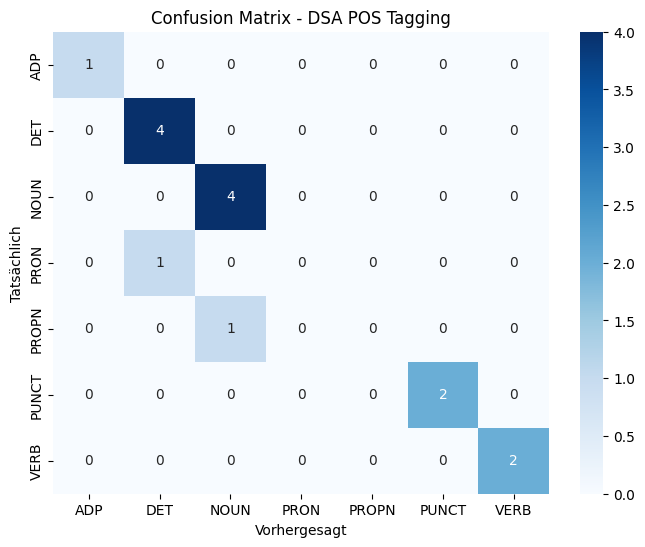

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

tags = sorted(set(gold_tags + pred_tags))
cm = confusion_matrix(gold_tags, pred_tags, labels=tags)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=tags, yticklabels=tags)
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.title("Confusion Matrix - DSA POS Tagging")
plt.show()
